In [19]:
from train import train
from model import DDQN, Net
from options import read_namespace
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

SEED=42
np.random.seed(SEED)
torch.manual_seed(SEED)

os.makedirs('saved_models', exist_ok=True)

TRAINING_OPTIONS = "train_options.json"
opt = read_namespace(TRAINING_OPTIONS)

NUM_STATES = 77
NUM_ACTIONS = 4

ACTIONS = ['NORTH', 'SOUTH', 'EAST', 'WEST']
NUM_ROWS = 7
NUM_COLS = 11

ddqn = DDQN(NUM_STATES, NUM_ACTIONS, opt.eps, opt)

In [25]:
def print_weights(net: Net) -> None:
  for i, weight in enumerate(net.parameters()):
    weight = weight.detach().cpu().numpy()
    average_weight = np.mean(weight)
    min_weight = np.min(weight)
    max_weight = np.max(weight)
    print("Layer {0}: shape of {1} and average weight of {2:.3f} min weight of  {3:.3f} and max weight of {4:.3f}"
    .format(i, weight.shape, average_weight, min_weight, max_weight))
  
  total_params = sum(p.numel() for p in ddqn.eval_net.parameters())
  print("Total Parameters: {}".format(total_params))

print_weights(ddqn.target_net)

Layer 0: shape of (128, 77) and average weight of -0.031 min weight of  -0.531 and max weight of 0.356
Layer 1: shape of (128,) and average weight of -0.055 min weight of  -0.356 and max weight of 0.328
Layer 2: shape of (256, 128) and average weight of 0.010 min weight of  -0.779 and max weight of 0.879
Layer 3: shape of (256,) and average weight of 0.111 min weight of  -0.289 and max weight of 0.679
Layer 4: shape of (4, 256) and average weight of -0.125 min weight of  -1.062 and max weight of 1.104
Layer 5: shape of (4,) and average weight of -0.086 min weight of  -0.097 and max weight of -0.080
Total Parameters: 44036


In [21]:
rewards, wins = train(ddqn, opt.num_episodes)

  0%|          | 6/100000 [00:00<33:16, 50.09it/s]

saving model at episode 0 in save_path=./saved_models/ddqn-00000


  5%|▌         | 5008/100000 [02:01<41:14, 38.40it/s]

saving model at episode 5000 in save_path=./saved_models/ddqn-05000


 10%|█         | 10009/100000 [04:13<36:40, 40.89it/s]

saving model at episode 10000 in save_path=./saved_models/ddqn-10000


 15%|█▌        | 15001/100000 [06:22<41:40, 33.99it/s]

saving model at episode 15000 in save_path=./saved_models/ddqn-15000


 20%|██        | 20003/100000 [08:37<37:40, 35.38it/s]

saving model at episode 20000 in save_path=./saved_models/ddqn-20000


 25%|██▌       | 25006/100000 [10:53<31:57, 39.12it/s]

saving model at episode 25000 in save_path=./saved_models/ddqn-25000


 30%|███       | 30003/100000 [12:57<34:45, 33.56it/s]

saving model at episode 30000 in save_path=./saved_models/ddqn-30000


 35%|███▌      | 35001/100000 [15:20<43:04, 25.15it/s]

saving model at episode 35000 in save_path=./saved_models/ddqn-35000


 40%|████      | 40002/100000 [17:56<33:06, 30.20it/s]

saving model at episode 40000 in save_path=./saved_models/ddqn-40000


 45%|████▌     | 45002/100000 [20:21<31:02, 29.53it/s]

saving model at episode 45000 in save_path=./saved_models/ddqn-45000


 50%|█████     | 50002/100000 [22:49<30:13, 27.57it/s]

saving model at episode 50000 in save_path=./saved_models/ddqn-50000


 55%|█████▌    | 55002/100000 [25:22<29:30, 25.41it/s]

saving model at episode 55000 in save_path=./saved_models/ddqn-55000


 60%|██████    | 60001/100000 [28:05<26:14, 25.40it/s]

saving model at episode 60000 in save_path=./saved_models/ddqn-60000


 65%|██████▌   | 65001/100000 [30:39<24:30, 23.80it/s]

saving model at episode 65000 in save_path=./saved_models/ddqn-65000


 70%|███████   | 70001/100000 [33:12<25:02, 19.97it/s]

saving model at episode 70000 in save_path=./saved_models/ddqn-70000


 75%|███████▌  | 75000/100000 [36:02<12:52, 32.36it/s]

saving model at episode 75000 in save_path=./saved_models/ddqn-75000


 80%|████████  | 80001/100000 [38:55<19:22, 17.21it/s]

saving model at episode 80000 in save_path=./saved_models/ddqn-80000


 85%|████████▍ | 84998/100000 [42:50<11:25, 21.90it/s]

saving model at episode 85000 in save_path=./saved_models/ddqn-85000


 90%|█████████ | 90000/100000 [47:14<11:31, 14.46it/s]

saving model at episode 90000 in save_path=./saved_models/ddqn-90000


 95%|█████████▍| 94997/100000 [50:51<02:53, 28.81it/s]

saving model at episode 95000 in save_path=./saved_models/ddqn-95000


100%|██████████| 100000/100000 [54:52<00:00, 30.38it/s]


saving final model


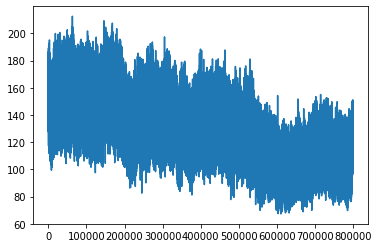

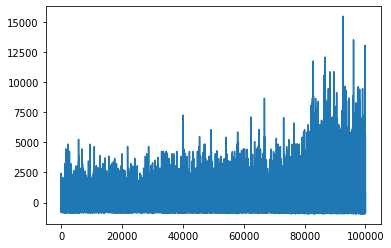

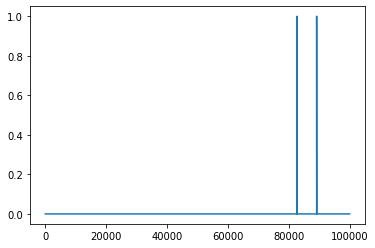

In [22]:
plt.plot(ddqn.losses)
plt.figure()
plt.plot(rewards)
plt.figure()
plt.plot(wins)


In [8]:
# !source /projectnb/cs542sp/nikzad/Famished-Geese/geese-torch-env/bin/activate
!pip3 install tensorboard

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.0 MB 5.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/share/pkg.7/python3/3.8.6/install/bin/python3.8 -m pip install --upgrade pip' command.


In [11]:
%tensorboard --logdir runs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.